In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('data.csv', index_col=["Date"])
data.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2017-09-01,Hyderabad,10.46,46.57,20.22,76.06,7.60,53.08,0.11,6.94,15.01,0.02,0.11,0.36,NaN,NaN
2017-09-02,Hyderabad,6.31,28.63,10.71,44.71,13.01,31.07,0.39,7.71,13.53,0.06,0.85,0.11,87.0,Satisfactory
2017-09-03,Hyderabad,10.40,30.27,13.23,57.09,17.23,15.31,0.45,10.59,14.46,0.06,0.49,1.06,78.0,Satisfactory
2017-09-04,Hyderabad,23.00,62.17,6.93,46.21,3.46,44.05,0.07,3.71,14.74,0.01,0.04,0.06,49.0,Good
2017-09-05,Hyderabad,15.46,65.00,9.88,52.18,9.57,53.10,0.22,4.28,14.68,0.03,0.19,0.32,NaN,NaN


In [3]:
da = pd.read_csv('data.csv')
da.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Hyderabad,2017-09-01,10.46,46.57,20.22,76.06,7.60,53.08,0.11,6.94,15.01,0.02,0.11,0.36,NaN,NaN
1,Hyderabad,2017-09-02,6.31,28.63,10.71,44.71,13.01,31.07,0.39,7.71,13.53,0.06,0.85,0.11,87.0,Satisfactory
2,Hyderabad,2017-09-03,10.40,30.27,13.23,57.09,17.23,15.31,0.45,10.59,14.46,0.06,0.49,1.06,78.0,Satisfactory
3,Hyderabad,2017-09-04,23.00,62.17,6.93,46.21,3.46,44.05,0.07,3.71,14.74,0.01,0.04,0.06,49.0,Good
4,Hyderabad,2017-09-05,15.46,65.00,9.88,52.18,9.57,53.10,0.22,4.28,14.68,0.03,0.19,0.32,NaN,NaN


In [4]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1379 non-null   object 
 1   Date        1379 non-null   object 
 2   PM2.5       1379 non-null   float64
 3   PM10        1377 non-null   float64
 4   NO          1379 non-null   float64
 5   NO2         1379 non-null   float64
 6   NOx         1379 non-null   float64
 7   NH3         1378 non-null   float64
 8   CO          1379 non-null   float64
 9   SO2         1379 non-null   float64
 10  O3          1379 non-null   float64
 11  Benzene     1379 non-null   float64
 12  Toluene     1379 non-null   float64
 13  Xylene      1379 non-null   float64
 14  AQI         1365 non-null   float64
 15  AQI_Bucket  1365 non-null   object 
dtypes: float64(13), object(3)
memory usage: 172.5+ KB


In [5]:
da['Date'] = pd.to_datetime(da['Date'])
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1379 non-null   object        
 1   Date        1379 non-null   datetime64[ns]
 2   PM2.5       1379 non-null   float64       
 3   PM10        1377 non-null   float64       
 4   NO          1379 non-null   float64       
 5   NO2         1379 non-null   float64       
 6   NOx         1379 non-null   float64       
 7   NH3         1378 non-null   float64       
 8   CO          1379 non-null   float64       
 9   SO2         1379 non-null   float64       
 10  O3          1379 non-null   float64       
 11  Benzene     1379 non-null   float64       
 12  Toluene     1379 non-null   float64       
 13  Xylene      1379 non-null   float64       
 14  AQI         1365 non-null   float64       
 15  AQI_Bucket  1365 non-null   object        
dtypes: datetime64[ns](1), fl

--> For this model, we are only looking at the PM2.5 Level concentration through the city of Hyderabad. So, since we are taking a time series model<br>
--> only the date and the pm2.5 levels are enough for forecasting

In [6]:
df = da[['PM2.5', 'Date']]
df.set_index("Date", inplace = True)
df.head()

,PM2.5
Date,
2017-09-01,10.46
2017-09-02,6.31
2017-09-03,10.40
2017-09-04,23.00
2017-09-05,15.46


In [7]:
len(df)

1379

we can see that we find only 1873 columns, this can be becaue of the fact that some rows are null and i have removed them manually while cleaning the data in excel

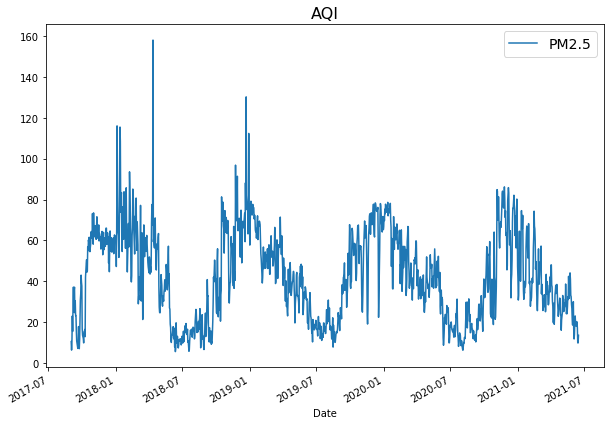

In [8]:
df.plot(figsize=(10, 7))
plt.title("AQI", fontsize=16)
plt.legend(fontsize=14);

In [9]:
timesteps = df.index.to_numpy()
prices = df["PM2.5"].to_numpy()

In [10]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1103, 276, 1103, 276)

#### Data manipulation (stationatiy and trend)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(x=df['PM2.5'], model='additive', period=6)

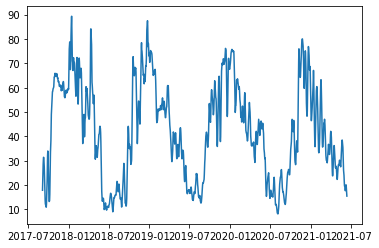

In [12]:
plt.plot(result.trend)

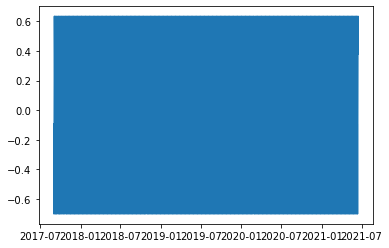

In [13]:
plt.plot(result.seasonal)

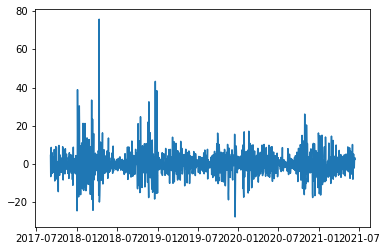

In [14]:
plt.plot(result.resid)

In [15]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['PM2.5'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    
adfuller_test(df['PM2.5'])

ADF Test Statistic : -3.0629992471640253
p-value : 0.02941536859715904
#Lags Used : 11
Number of Observations Used : 1367
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
    """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14) # make label bigger
    plt.grid(True)

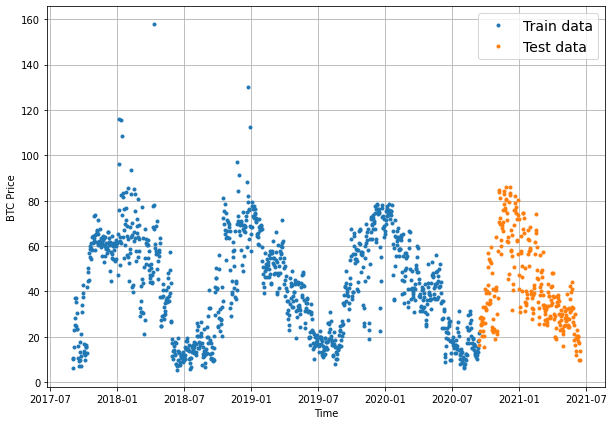

In [17]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#### Model 0: Naïve forecast (baseline)

use the previous timestep value to predict the next timestep value.

In [18]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([16.32, 18.39, 22.47, 28.23, 28.85, 25.01, 25.6 , 20.54, 25.81,
        27.01]),
 array([19.57, 23.02, 19.49, 20.2 , 17.96, 20.26, 19.96, 17.19,  9.87,
         9.8 ]))

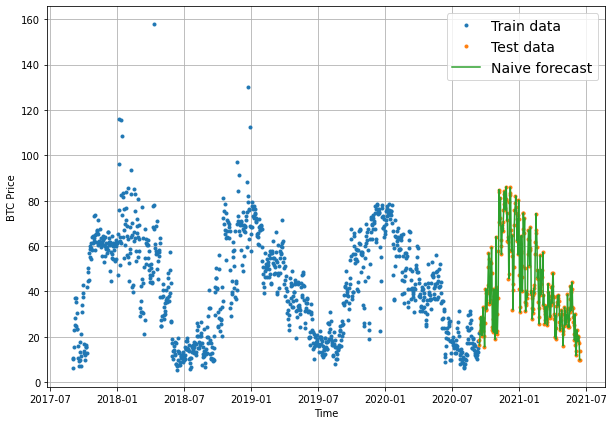

In [19]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

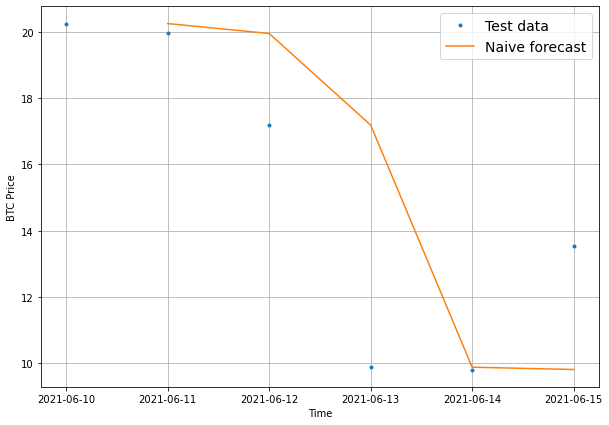

In [20]:
plt.figure(figsize=(10, 7))
offset = 270 # offset the values by 270 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

not a perfect fit

#### Important parameters

In [21]:
import tensorflow as tf

In [22]:
def mean_absolute_scaled_error(y_true, y_pred):
    tf.reduce_mean(tf.abs(y_true - y_pred))
    # Find MAE of naive forecast (no seasonality)
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season

In [23]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
  
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [24]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 6.3385816,
 'mse': 73.929634,
 'rmse': 8.598234,
 'mape': 16.50278,
 'mase': 0.99754816}

In [25]:
# Find average AQI in test dataset
tf.reduce_mean(y_test).numpy()

42.68007246376811

#### Making windows of our time series to make it used in supervised learning

In [26]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [27]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
    return x[:, :-horizon], x[:, -horizon:]

In [28]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


#### For entire dataset

In [29]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
    """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

  # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [30]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1372, 1372)

In [31]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [10.46  6.31 10.4  23.   15.46 28.28 37.15] -> Label: [25.]
Window: [ 6.31 10.4  23.   15.46 28.28 37.15 25.  ] -> Label: [35.34]
Window: [10.4  23.   15.46 28.28 37.15 25.   35.34] -> Label: [37.09]


In [32]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [23.02 19.49 20.2  17.96 20.26 19.96 17.19] -> Label: [9.87]
Window: [19.49 20.2  17.96 20.26 19.96 17.19  9.87] -> Label: [9.8]
Window: [20.2  17.96 20.26 19.96 17.19  9.87  9.8 ] -> Label: [13.53]


#### Turning windows into training and test sets

In [33]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
  Splits matching pairs of windows and labels into train and test splits.
  """
    split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [34]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1097, 275, 1097, 275)

#### Model checkpoint to note the best performance on preferred parameters

In [35]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon = 1)


We're going to start by keeping it simple, `model_1` will have:
* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Why these values?

I picked them out of experimentation. 

A batch size of 32 works pretty well too and we could always train for less epochs but since the model runs so fast (you'll see in a second, it's because the number of samples we have isn't massive) we might as well train for more.

> 🔑 **Note:** As always, many of the values for machine learning problems are experimental. A reminder that the values you can set yourself in a machine learning algorithm (the hidden units, the batch size, horizon size, window size) are called [**hyperparameters**](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)). And experimenting to find the best values for hyperparameters is called **hyperparameter tuning**. Where as parameters learned by a model itself (patterns in the data, formally called weights & biases) are referred to as **parameters**.

Let's import TensorFlow and build our first deep learning model for time series.

In [36]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of AQI
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
1/9 [==>...........................] - ETA: 0s - loss: 27.1683 - mae: 27.1683WARNING:tensorflow:From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_experiments\model_1_dense\assets
9/9 [==============================] - 2s 207ms/step - loss: 16.9570 - mae: 16.9570 - val_loss: 9.6686 - val_mae: 9.6686
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 8.4325 - mae: 8.4325 - val_loss: 10.2017 - val_mae: 10.2017
Epoch 3/100
9/9 [==============================] - 1s 126ms/step - loss: 7.8007 - mae: 7.8007 - val_loss: 9.04

Epoch 35/100
9/9 [==============================] - 1s 166ms/step - loss: 5.8153 - mae: 5.8153 - val_loss: 6.3223 - val_mae: 6.3223
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 5.8919 - mae: 5.8919 - val_loss: 6.4808 - val_mae: 6.4808
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 5.8630 - mae: 5.8630 - val_loss: 6.3859 - val_mae: 6.3859
Epoch 38/100
9/9 [==============================] - 1s 143ms/step - loss: 5.7725 - mae: 5.7725 - val_loss: 6.3143 - val_mae: 6.3143
Epoch 39/100
9/9 [==============================] - 1s 129ms/step - loss: 5.8064 - mae: 5.8064 - val_loss: 6.3060 - val_mae: 6.3060
Epoch 40/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7589 - mae: 5.7589 - val_loss: 6.3749 - val_mae: 6.3749
Epoch 41/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7700 - mae: 5.7700 - val_loss: 6.3698 - val_mae: 6.3698
Epoch 42/100
9/9 [==============================] - 1s 117ms/step - loss: 5.7352 - m

In [37]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 1ms/step - loss: 6.3080 - mae: 6.3080


[6.307955741882324, 6.307955741882324]

the below is the use of creating check points

In [38]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 1ms/step - loss: 6.2792 - mean_absolute_error: 6.2792


[6.27922248840332, 6.27922248840332]

#### making predictions

In [39]:
def make_preds(model, input_data):
    """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [40]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(275,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([16.468403, 17.44904 , 21.258179, 25.458439, 26.793095, 25.085735,
        24.789143, 20.460018, 24.925385, 26.626793], dtype=float32)>)

In [41]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 6.279222,
 'mse': 72.58966,
 'rmse': 8.519957,
 'mape': 16.429499,
 'mase': 0.9882063}

In [42]:
naive_results

{'mae': 6.3385816,
 'mse': 73.929634,
 'rmse': 8.598234,
 'mape': 16.50278,
 'mase': 0.99754816}

## Model 2: Dense (window = 30, horizon = 1)¶

In [43]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1349, 1349)

In [44]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1079, 270, 1079, 270)

In [45]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [46]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 1ms/step - loss: 6.4780


6.4780354499816895

In [47]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 6.478035,
 'mse': 77.56966,
 'rmse': 8.8073635,
 'mape': 16.48021,
 'mase': 1.009525}

worse than the previous one

## Model 3: Dense (window = 30, horizon = 7)

In [48]:
HORIZON = 7 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1343, 1343)

In [49]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1074, 269, 1074, 269)

In [50]:
# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [51]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 10.6672


10.667226791381836

In [52]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

# Evaluate results for model 3 predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 8.282644 ,  8.579476 ,  8.05706  ,  5.5957694,  4.270797 ,
         4.8440747,  3.8640943,  5.379136 ,  4.968495 ,  5.188067 ,
         6.640615 ,  8.554085 ,  9.812169 , 11.303809 , 15.558947 ,
        13.468144 ,  9.339388 ,  5.3994927,  9.600423 , 13.328477 ,
        13.50876  , 12.648865 ,  9.321004 ,  7.5270085,  7.6224966,
         7.83976  , 10.38339  ,  9.65323  , 10.827318 , 13.506111 ,
        14.8045435, 14.588281 , 12.606439 , 14.244582 , 16.984516 ,
         9.074631 ,  8.652483 ,  9.06738  , 12.841552 , 12.015159 ,
        12.9684305, 13.377014 , 14.188937 , 15.142473 , 10.54698  ,
        13.886088 , 17.457005 , 21.360737 , 23.897602 , 28.643297 ,
        38.02329  , 40.379505 , 31.218079 , 13.482749 ,  7.7520914,
         8.398027 ,  8.373976 ,  6.5669904,  6.6101565,  7.1211114,
        14.50284  , 11.422786 , 11.549493 ,  9.948593 , 11.258269 ,
        16.732592 , 14.037791 ,  6.69634  ,  4.9725747,  6.337787 ,
         8.650827 , 11.062297 , 14.535551

adjust the values since we are predicting for 7 days---and is multidimensional

In [53]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [54]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 10.667227,
 'mse': 190.35005,
 'rmse': 12.256159,
 'mape': 27.85278,
 'mase': 1.6606493}

Our best model

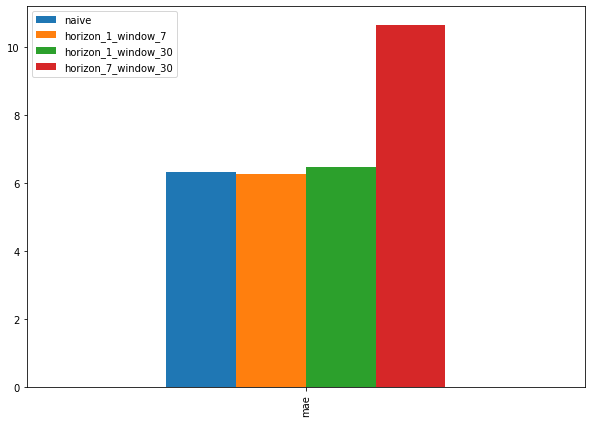

In [55]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

#### From next on, we use Horizon = 1 and Window = 7

## Model 4: Conv1D

In [56]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [57]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1372, 1372)

In [58]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1097, 275, 1097, 275)

In [59]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
tf.keras.backend.set_floatx('float64')
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[10.46]
 [ 6.31]
 [10.4 ]
 [23.  ]
 [15.46]
 [28.28]
 [37.15]]


In [60]:
# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets
INFO:tensorflow:Assets wr

In [61]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1, 7)              0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 128)            4608      
_________________________________________________________________
dense_6 (Dense)              (None, 1, 1)              129       
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 6.2862


6.286226969632235

In [63]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)

# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 6.2862267,
 'mse': 72.642685,
 'rmse': 8.523067,
 'mape': 16.505362,
 'mase': 0.9893087}

looks good

## Model 5: RNN (LSTM)

In [65]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
9/9 [==============================] - 6s 676ms/step - loss: 38.1406 - val_loss: 32.3930
Epoch 2/100
9/9 [==============================] - 6s 669ms/step - loss: 26.1522 - val_loss: 16.8655
Epoch 3/100
9/9 [==============================] - 5s 580ms/step - loss: 11.0375 - val_loss: 10.2596
Epoch 4/100
9/9 [==============================] - 5s 540ms/step - loss: 9.3495 - val_loss: 9.7477
Epoch 5/100
9/9 [==============================] - 7s 757ms/step - loss: 7.6118 - val_loss: 9.2886
Epoch 6/100
9/9 [==============================] - 7s 811ms/step - loss: 7.3354 - val_loss: 8.3708
Epoch 7/100
9/9 [==============================] - 7s 767ms/step - loss: 6.9469 - val_loss: 8.0092
Epoch 8/100
9/9 [==============================] - 6s 649ms/step - loss: 6.7013 - val_loss: 7.5330
Epoch 9/100
9/9 [==============================] - 8s 897ms/step - loss: 6.5388 - val_loss: 7.2012
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 6.5819 - val_loss: 7.4359
Epoch

In [66]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 6.2929


6.292875711267644

In [67]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)

# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 6.292876,
 'mse': 73.69672,
 'rmse': 8.58468,
 'mape': 16.615082,
 'mase': 0.99035513}

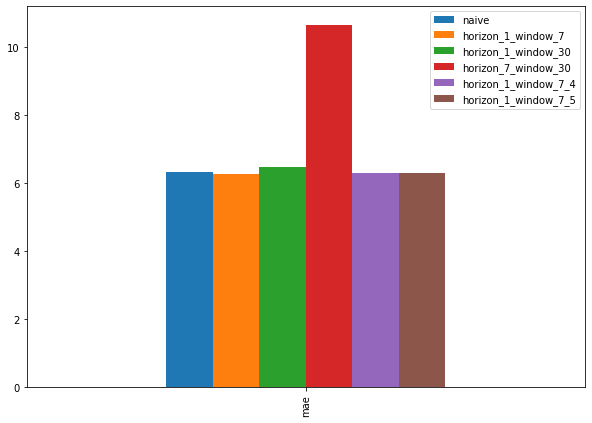

In [68]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"],
             "horizon_1_window_7_4": model_4_results["mae"],
             "horizon_1_window_7_5": model_5_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [69]:
# TODO: Fix the names of the models/results are they comparable?
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense": model_1_results,
                              "model_2_dense": model_2_results,
                              "model_3_dense": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results
                              }).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,6.338582,73.929634,8.598234,16.502781,0.997548
model_1_dense,6.279222,72.589661,8.519957,16.429499,0.988206
model_2_dense,6.478035,77.569656,8.807364,16.480209,1.009525
model_3_dense,10.667227,190.350052,12.256159,27.852779,1.660649
model_4_CONV1D,6.286227,72.642685,8.523067,16.505362,0.989309
model_5_LSTM,6.292876,73.696716,8.584680,16.615082,0.990355


Looks like model  have a lo mae score..so, will be using that as our final model

## Make future predictions

In [70]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 

In [71]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
    for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
    return future_forecast

In [72]:
y_all = df["PM2.5"].to_numpy()
future_forecast = make_future_forecast(values=y_all,
                                       model=model_4,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [17.96 20.26 19.96 17.19  9.87  9.8  13.53] -> Prediction: 14.51630924200146

Predicting on: 
 [20.26       19.96       17.19        9.87        9.8        13.53
 14.51630924] -> Prediction: 15.11345142676812

Predicting on: 
 [19.96       17.19        9.87        9.8        13.53       14.51630924
 15.11345143] -> Prediction: 15.720502082754345

Predicting on: 
 [17.19        9.87        9.8        13.53       14.51630924 15.11345143
 15.72050208] -> Prediction: 16.30588763692548

Predicting on: 
 [ 9.87        9.8        13.53       14.51630924 15.11345143 15.72050208
 16.30588764] -> Prediction: 15.882713904045193

Predicting on: 
 [ 9.8        13.53       14.51630924 15.11345143 15.72050208 16.30588764
 15.8827139 ] -> Prediction: 15.482237652590255

Predicting on: 
 [13.53       14.51630924 15.11345143 15.72050208 16.30588764 15.8827139
 15.48223765] -> Prediction: 15.541777466803058

Predicting on: 
 [14.51630924 15.11345143 15.72050208 16.30588764 15.8827139  15

In [73]:
future_forecast[:15]

[14.51630924200146,
 15.11345142676812,
 15.720502082754345,
 16.30588763692548,
 15.882713904045193,
 15.482237652590255,
 15.541777466803058,
 15.739117938490205,
 15.927324685756997,
 16.141486146151696,
 16.391460208145045,
 16.55588791777883,
 16.654950227908795,
 16.75392444725571]

In [74]:
def get_future_dates(start_date, into_future, offset=1):
    """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
    start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
    end_date = start_date + np.timedelta64(into_future, "D") # specify end date
    return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date

In [75]:
df.index

DatetimeIndex(['2017-09-01', '2017-09-02', '2017-09-03', '2017-09-04',
               '2017-09-05', '2017-09-06', '2017-09-07', '2017-09-08',
               '2017-09-09', '2017-09-10',
               ...
               '2021-06-06', '2021-06-07', '2021-06-08', '2021-06-09',
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15'],
              dtype='datetime64[ns]', name='Date', length=1379, freq=None)

In [76]:
# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = df.index[-1]
last_timestep

Timestamp('2021-06-15 00:00:00')

In [77]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19',
       '2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27',
       '2021-06-28', '2021-06-29'], dtype='datetime64[D]')

In [78]:
btc = df['PM2.5'].to_numpy()
btc[:10]

array([10.46,  6.31, 10.4 , 23.  , 15.46, 28.28, 37.15, 25.  , 35.34,
       37.09])

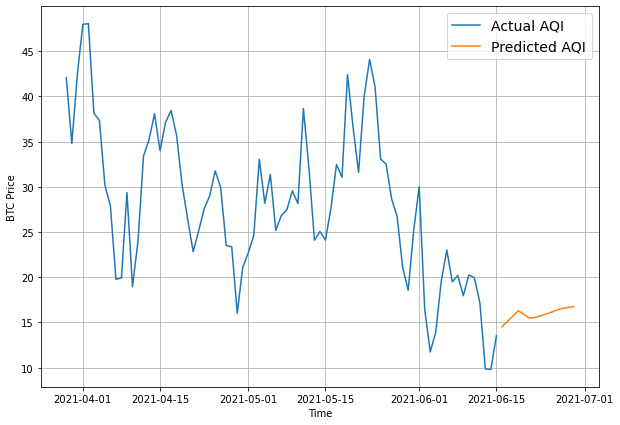

In [79]:
plt.figure(figsize=(10, 7))
plot_time_series(df.index, btc, start=1300, format="-", label="Actual AQI")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted AQI")

## But, how well did our model predicted on the future??

<br>
Let's test this out

In [80]:
# Let's introduce a Turkey problem to our BTC data (AQI BTC falls 100x in one day)
btc_price_turkey = btc.copy()
btc_price_turkey[-1] = btc_price_turkey[-1] / 100

btc_price_turkey[-10:]

array([23.02  , 19.49  , 20.2   , 17.96  , 20.26  , 19.96  , 17.19  ,
        9.87  ,  9.8   ,  0.1353])

the variation above shocases how the data reacts when there is a 100 times changes happens to our mdoel

In [81]:
# Get the timesteps for the turkey problem 
btc_timesteps_turkey = np.array(df.index)
btc_timesteps_turkey[-10:]

array(['2021-06-06T00:00:00.000000000', '2021-06-07T00:00:00.000000000',
       '2021-06-08T00:00:00.000000000', '2021-06-09T00:00:00.000000000',
       '2021-06-10T00:00:00.000000000', '2021-06-11T00:00:00.000000000',
       '2021-06-12T00:00:00.000000000', '2021-06-13T00:00:00.000000000',
       '2021-06-14T00:00:00.000000000', '2021-06-15T00:00:00.000000000'],
      dtype='datetime64[ns]')

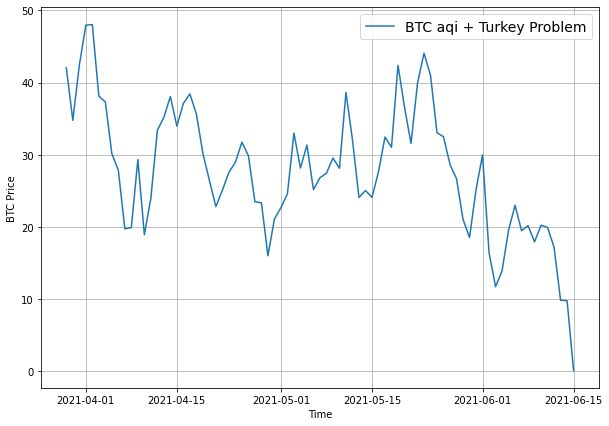

In [82]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey, 
                 values=btc_price_turkey, 
                 format="-", 
                 label="BTC aqi + Turkey Problem", 
                 start=1300)

If you observe carefully, we can see that the turkey model completely lost it when coming to the 100 times change in data. But, this generally happens only a few times.

In [83]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(1097, 275, 1097, 275)

## Building a turkey model (model to predict on turkey data)

In [84]:
# Clone model 1 architecture for turkey model and fit the turkey model on the turkey data
turkey_model = tf.keras.models.clone_model(model_4)
turkey_model._name = "Turkey_Model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiments\Turkey_Model\assets
INFO:tensorflow:Assets written to: model_experiment

In [85]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/Turkey_Model/")
turkey_model.evaluate(X_test, y_test)

turkey_preds = make_preds(turkey_model, X_test)

# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

9/9 [==============================] - 0s 2ms/step - loss: 6.2826


{'mae': 20.428394,
 'mse': 663.9704,
 'rmse': 24.692965,
 'mape': 168.21506,
 'mase': 3.2040417}

In [86]:
model_4_results

{'mae': 6.2862267,
 'mse': 72.642685,
 'rmse': 8.523067,
 'mape': 16.505362,
 'mase': 0.9893087}

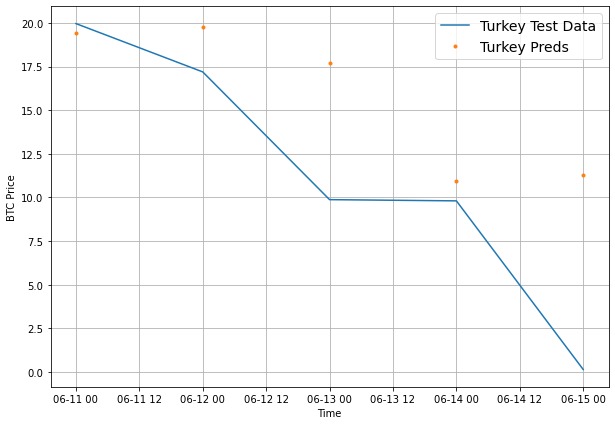

In [87]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=270
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset);

## Compare Models

In [88]:
# TODO: Fix the names of the models/results are they comparable?
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense": model_1_results,
                              "model_2_dense": model_2_results,
                              "model_3_dense": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,6.338582,73.929634,8.598234,16.502781,0.997548
model_1_dense,6.279222,72.589661,8.519957,16.429499,0.988206
model_2_dense,6.478035,77.569656,8.807364,16.480209,1.009525
model_3_dense,10.667227,190.350052,12.256159,27.852779,1.660649
model_4_CONV1D,6.286227,72.642685,8.523067,16.505362,0.989309
model_5_LSTM,6.292876,73.696716,8.584680,16.615082,0.990355
model_6_turkey,20.428394,663.970398,24.692965,168.215057,3.204042


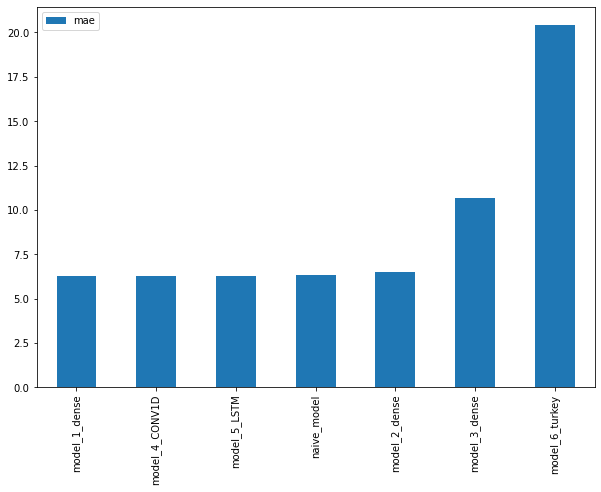

In [89]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

In [116]:
ft = list(zip(next_time_steps, future_forecast))
a = pd.DataFrame(ft)
col = [['Date', 'PM2.5_level']]
a.columns = col
a

,Date,PM2.5_level
0,2021-06-16,14.516309
1,2021-06-17,15.113451
2,2021-06-18,15.720502
3,2021-06-19,16.305888
4,2021-06-20,15.882714
5,2021-06-21,15.482238
6,2021-06-22,15.541777
7,2021-06-23,15.739118
8,2021-06-24,15.927325
9,2021-06-25,16.141486
